In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
m=pd.read_csv('/content/Mocktest.csv')

In [ ]:
m.head()

,S.No,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY
0,1,59,0,1,1,0,1,1
1,2,36,3057,0,1,0,1,1
2,3,47,126,0,1,0,0,0
3,4,43,388,0,1,0,0,0
4,5,34,462,1,0,0,0,0


In [ ]:
# prompt: remove S.No from the list

m.drop(columns=['S.No'], inplace=True)
m.head()


,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY
0,59,0,1,1,0,1,1
1,36,3057,0,1,0,1,1
2,47,126,0,1,0,0,0
3,43,388,0,1,0,0,0
4,34,462,1,0,0,0,0


In [ ]:
# prompt: remove the outliers in  age, balance

# Remove outliers in age
def remove_outliers(df, columns):
    for column in columns:
        Q1 = np.percentile(df[column], 25, interpolation='midpoint')
        Q3 = np.percentile(df[column], 75, interpolation='midpoint')
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

m1 = remove_outliers(m, ['age', 'balance'])
m1.head()

<ipython-input-87-9578a3e88ee6>:14: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  m1 = remove_outliers(m, ['age', 'balance'])


,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY
0,59,0,1,1,0,1,1
1,36,3057,0,1,0,1,1
2,47,126,0,1,0,0,0
3,43,388,0,1,0,0,0
4,34,462,1,0,0,0,0


In [ ]:
m1.count()

age              393
balance          393
Gender           393
HousingLoan      393
PersonalLoan     393
Campaign         393
SubscriptionY    393
dtype: int64

In [ ]:
# prompt: calculate mean age for SubscriptionY of column 0

m1[m1['SubscriptionY'] == 0]['age'].mean()


37.09885931558935

In [ ]:
# prompt: view subscription and age column alone

m1[['SubscriptionY', 'age']]


,SubscriptionY,age
0,1,59
1,1,36
2,0,47
3,0,43
4,0,34
...,...,...
431,1,58
432,0,36
433,0,27
434,1,60


In [ ]:
# prompt: filter based on the subscription status

m_filtered = m1[m1['SubscriptionY'] == 1]


In [ ]:
m_filtered.head()

,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY
0,59,0,1,1,0,1,1
1,36,3057,0,1,0,1,1
5,49,320,1,1,0,0,1
6,54,-315,1,1,1,1,1
11,56,1238,0,1,0,1,1


In [ ]:
m_filtered[['SubscriptionY', 'age']]

,SubscriptionY,age
0,1,59
1,1,36
5,1,49
6,1,54
11,1,56
...,...,...
420,1,57
423,1,58
427,1,33
431,1,58


In [ ]:
# prompt: calculate the average age in m_filtered

average_age = m_filtered['age'].mean()
print(average_age)
#the average age of the customers who have subscribed to the term deposit is 51


50.96153846153846


In [ ]:
m_filtered1 = m1[m1['SubscriptionY'] == 0]
m_filtered1.head()

,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY
2,47,126,0,1,0,0,0
3,43,388,0,1,0,0,0
4,34,462,1,0,0,0,0
7,29,778,1,0,0,0,0
8,40,-1212,0,0,0,0,0


In [ ]:
m_filtered1[['SubscriptionY', 'age']]

,SubscriptionY,age
2,0,47
3,0,43
4,0,34
7,0,29
8,0,40
...,...,...
429,0,46
430,0,35
432,0,36
433,0,27


In [ ]:
average_age = m_filtered1['age'].mean()
print(average_age)
# the average age of the customers who have not subscribed to the term deposit is 37

37.09885931558935


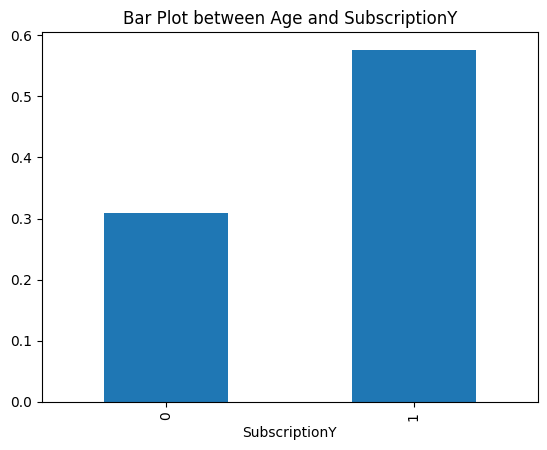

In [ ]:
import matplotlib.pyplot as plt
m1.groupby('SubscriptionY')['age'].mean().plot(kind='bar')
plt.title('Bar Plot between Age and SubscriptionY')
plt.show()

In [ ]:
m_filtered[['SubscriptionY', 'balance']]

,SubscriptionY,balance
0,1,0
1,1,3057
5,1,320
6,1,-315
11,1,1238
...,...,...
420,1,0
423,1,116
427,1,3143
431,1,4007


In [ ]:
average_balance = m_filtered['balance'].mean()
print(average_balance)
#the mean credit balance of the customers who have subscribed to term deposit is 1064

1064.8307692307692


In [ ]:
m_filtered1[['SubscriptionY', 'balance']]

,SubscriptionY,balance
2,0,126
3,0,388
4,0,462
7,0,778
8,0,-1212
...,...,...
429,0,705
430,0,44
432,0,1925
433,0,81


In [ ]:
average_balance = m_filtered1['balance'].mean()
print(average_balance)
#the mean credit balance of the customers who have not subscribed to term deposit is 1064

976.0988593155894


In [ ]:
# prompt: perform two proportion t test with means 1064.8307692307692 and 976.0988593155894

from scipy.stats import ttest_ind

# Set the two sample means
mean1 = 1064.8307692307692
mean2 = 976.0988593155894

# Set the sample sizes
n1 = len(m_filtered)
n2 = len(m_filtered1)

# Set the alpha level
alpha = 0.05

# Perform the two-proportion t-test
t_statistic, p_value = ttest_ind(m_filtered['balance'], m_filtered1['balance'], equal_var=False)

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean balance between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean balance between the two groups.")


t-statistic: 0.6933262181250541
p-value: 0.4887771257429707
Fail to reject the null hypothesis: There is no significant difference in the mean balance between the two groups.


In [ ]:
# prompt: filter based on subscriptionY and housing loan

m_filtered_housing_loan = m1[m1['SubscriptionY'] == 1]
m_filtered_housing_loan = m_filtered_housing_loan[m_filtered_housing_loan['HousingLoan'] == 1]
m_filtered_housing_loan.head(20)


,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY,Prediction
0,0.730769,0.215390,1,1,0,1,1,1
1,0.288462,0.758664,0,1,0,1,1,1
5,0.538462,0.272259,1,1,0,0,1,0
6,0.634615,0.159410,1,1,1,1,1,1
11,0.673077,0.435401,0,1,0,1,1,1
21,0.538462,0.596766,0,1,0,1,1,1
23,0.673077,0.223387,0,1,0,1,1,1
30,0.634615,0.215390,0,1,0,1,1,1
36,0.538462,0.349565,0,1,0,1,1,1
38,0.711538,0.610450,1,1,0,1,1,1


In [ ]:
m_filtered_housing_loan.count()

age              98
balance          98
Gender           98
HousingLoan      98
PersonalLoan     98
Campaign         98
SubscriptionY    98
Prediction       98
dtype: int64

In [ ]:
m_filtered_housing_loan1 = m1[m1['SubscriptionY'] == 0]
m_filtered_housing_loan1 = m_filtered_housing_loan1[m_filtered_housing_loan1['HousingLoan'] == 1]
m_filtered_housing_loan1.head(20)


,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY
2,47,126,0,1,0,0,0
3,43,388,0,1,0,0,0
12,40,1361,1,1,0,0,0
13,58,1831,0,1,0,0,0
18,44,244,1,1,0,0,0
22,43,3285,1,1,0,0,0
27,45,0,0,1,0,0,0
31,30,315,1,1,0,0,0
32,30,3107,0,1,0,0,0
37,48,1175,1,1,0,0,0


In [ ]:
m_filtered_housing_loan1.count()

age              83
balance          83
Gender           83
HousingLoan      83
PersonalLoan     83
Campaign         83
SubscriptionY    83
dtype: int64

In [ ]:
# prompt:  What proportion of customers with a housing loan subscribe to term deposits compared to those without?

# Calculate the proportion of customers with a housing loan who subscribe to term deposits
proportion_housing_loan_yes = len(m_filtered_housing_loan) / len(m1[m1['HousingLoan'] == 1])

# Calculate the proportion of customers without a housing loan who subscribe to term deposits
proportion_housing_loan_no = len(m_filtered_housing_loan1) / len(m1[m1['HousingLoan'] == 0])

# Print the results
print("Proportion of customers with a housing loan who subscribe to term deposits:", proportion_housing_loan_yes)
print("Proportion of customers without a housing loan who subscribe to term deposits:", proportion_housing_loan_no)


Proportion of customers with a housing loan who subscribe to term deposits: 0.5414364640883977
Proportion of customers without a housing loan who subscribe to term deposits: 0.3915094339622642


In [ ]:
m1.head()

,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY
0,59,0,1,1,0,1,1
1,36,3057,0,1,0,1,1
2,47,126,0,1,0,0,0
3,43,388,0,1,0,0,0
4,34,462,1,0,0,0,0


In [ ]:
m1.count()

age              393
balance          393
Gender           393
HousingLoan      393
PersonalLoan     393
Campaign         393
SubscriptionY    393
dtype: int64

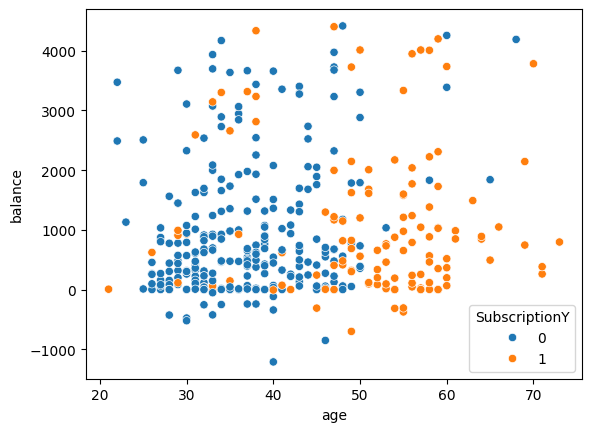

In [ ]:
# prompt: generate scatter plot  to visualize the relationship between age and credit balance, colored by subscription status

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with age on the x-axis, credit balance on the y-axis, and colored by subscription status
sns.scatterplot(data=m1, x="age", y="balance", hue="SubscriptionY")

# Show the plot
plt.show()

#From the plot below, we can infer that there is a positive correlation between age and credit balance.,ie, as age increases, their credit balance also tend to increase


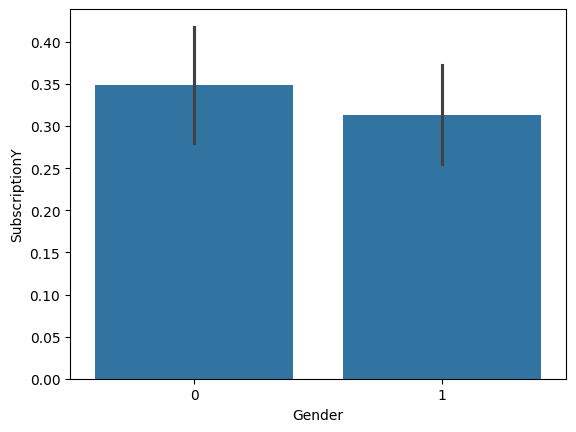

In [ ]:
# prompt: bar chart for gender and subscriptionY

sns.barplot(x="Gender", y="SubscriptionY", data=m1)
plt.show()

#It shows that a higher proportion of males have subscribed to the term deposit than that of females

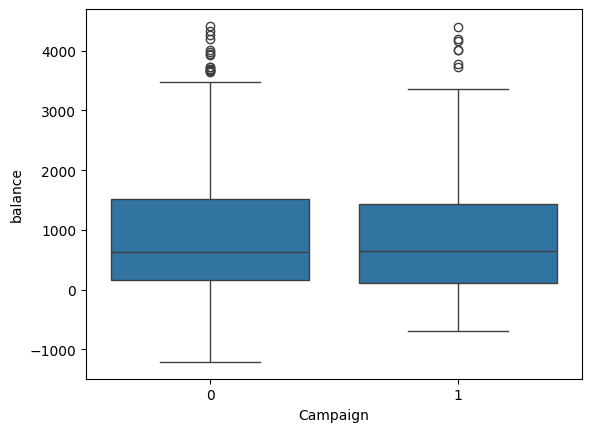

In [ ]:
# prompt: Generate a boxplot to compare the  balance and campaign

sns.boxplot(x="Campaign", y="balance", data=m1)
plt.show()

#from the box plot, we can infer that there is no significant difference in the mean across two campaigns which we have already proved using t test.


In [ ]:
import statsmodels.api as sm

# Define the dependent and independent variables
y = m1['SubscriptionY']
X = m1[['age', 'balance', 'Gender', 'HousingLoan', 'PersonalLoan', 'Campaign',]]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.260866
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          SubscriptionY   No. Observations:                  393
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.5890
Time:                        12:39:39   Log-Likelihood:                -102.52
converged:                       True   LL-Null:                       -249.45
Covariance Type:            nonrobust   LLR p-value:                 1.690e-60
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.0415      1.078     -7.457      0.000     -10.155      -5.928
age              0.1264

In [ ]:
from os import MFD_HUGE_16MB
# prompt: scale age and balance in m1 data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to the age and balance columns
scaler.fit(m1[['age', 'balance']])

# Transform the age and balance columns
m1[['age', 'balance']] = scaler.transform(m1[['age', 'balance']])

# Print the transformed data
m1.head()


,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY
0,0.730769,0.215390,1,1,0,1,1
1,0.288462,0.758664,0,1,0,1,1
2,0.500000,0.237782,0,1,0,0,0
3,0.423077,0.284343,0,1,0,0,0
4,0.250000,0.297494,1,0,0,0,0


In [ ]:
# prompt: import m1 into excel file

m1.to_excel("/content/m1.xlsx")


In [ ]:
# prompt: perform logistic regression with subcription as dv and other factors as iv

import statsmodels.api as sm

# Define the dependent and independent variables
y = m1['SubscriptionY']
X = m1[['age', 'balance', 'Gender', 'HousingLoan', 'PersonalLoan', 'Campaign',]]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

# Only the age and campaign factors are significant in the model ;ie, they both affect the subscription

Optimization terminated successfully.
         Current function value: 0.260866
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          SubscriptionY   No. Observations:                  393
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.5890
Time:                        12:39:59   Log-Likelihood:                -102.52
converged:                       True   LL-Null:                       -249.45
Covariance Type:            nonrobust   LLR p-value:                 1.690e-60
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.3433      0.688     -7.769      0.000      -6.691      -3.995
age              6.5714

In [ ]:

age              6.5714
balance         -0.2058
Gender           0.3254
HousingLoan      0.5658
PersonalLoan    -0.4910
Campaign         3.8423

# With one unit increase in age, the rate of subscription increases by 6.57 units(positively corelated)
# With one unit increase in balance, the rate of subscription decreases by 0.2058 units(negatively corelated)
# With one unit increase in gender, the rate of subscription increases by 0.3254 units(positively corelated)
# With one unit increase in housing loan, the rate of subscription increases by 0.5658 units(positively corelated)
# With one unit increase in personal loan, the rate of subscription decreases by 0.4910 units(negatively corelated)
# With one unit increase in campaign, the rate of subscription increases by 3.8423 units(positively corelated)

In [ ]:
import statsmodels.api as sm

# Define the dependent and independent variables
y = m1['SubscriptionY']
X = m1[['age', 'Campaign']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.263917
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          SubscriptionY   No. Observations:                  393
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.5842
Time:                        12:40:01   Log-Likelihood:                -103.72
converged:                       True   LL-Null:                       -249.45
Covariance Type:            nonrobust   LLR p-value:                 5.122e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3040      0.547     -9.702      0.000      -6.376      -4.233
age            7.4155      1.

In [ ]:
from sklearn.linear_model import LogisticRegression
target = m1['SubscriptionY']
predictors = m1[['age', 'Campaign']]

# Create a logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(predictors, target)

# Predict the status
predictions = model.predict(predictors)

# Print the predictions
print(predictions)

[1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [ ]:
# prompt: import prediction to excel file

import pandas as pd

# Create a Pandas DataFrame with your predictions
predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

# Write the DataFrame to an Excel file
predictions_df.to_excel('predictions.xlsx', sheet_name='Sheet1')


In [ ]:
# prompt: combine subscriptionY and prediction

# Create a new column in m2 called 'Prediction' and assign the values from predictions
m1['Prediction'] = predictions

# Print the first few rows of m2 to see the combined data
m1.head()


,age,balance,Gender,HousingLoan,PersonalLoan,Campaign,SubscriptionY,Prediction
0,0.730769,0.215390,1,1,0,1,1,1
1,0.288462,0.758664,0,1,0,1,1,1
2,0.500000,0.237782,0,1,0,0,0,0
3,0.423077,0.284343,0,1,0,0,0,0
4,0.250000,0.297494,1,0,0,0,0,0


In [ ]:
# prompt: view only subscription and prediction in the table

m1[['SubscriptionY', 'Prediction']]


,SubscriptionY,Prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
431,1,0
432,0,0
433,0,0
434,1,0


In [ ]:
# prompt: construct a confusion matrix for the above table

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
confusion_matrix = confusion_matrix(m1['SubscriptionY'], m1['Prediction'])

# Print the confusion matrix
print(confusion_matrix)


[[245  18]
 [ 27 103]]


In [ ]:
348/393

# the model is 88.5% accurate



0.8854961832061069